In [3]:
# make all plots larger and more visible on dark background:
plt.rcParams['figure.figsize'] = [7, 6]
plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'})

plt.rcParams['figure.dpi']= 300

In [1]:
import sympy
from sympy.printing.latex import latex
from sympy.printing import pretty
from sympy import init_printing
import matplotlib.pyplot as plt
#init_printing(use_latex="mathjax") # doctest: +SKIP
sympy.init_printing(use_latex='mathjax')

In [2]:
def latex_out(sympyequation):
    return '$'+latex(sympyequation, order='old', long_frac_ratio = 1,mul_symbol='dot')+'$'


In [11]:
# MLD-dynamics
# Material exchange between the two layers = K
# MLD depth as function of time = M(t)
# h+(t) is a function describing entrainment and detrainment
# h(t) is derivtive of MLD depth
# k is constant mixing parameter
K, k, M, Mt, hplus, h, t = sympy.symbols('K,kappa,M,M(t),h^{+}(t),h(t),t')
Kmix = (k+hplus)/Mt
hplust = sympy.Max(h,0)
ht = sympy.Derivative(Mt,t)
K_EQ = (k+sympy.Max(ht,0))/Mt
# For Zooplankton, K is given as K_Z = h(t) - actively maintain wihtin upper ML
K_Z = ht/Mt

# Nitrate
# δD is the mineralization rate and 
# N0 is the nitrogen concentration below the upper mixed layer
Nt,N0,deltaD_N,Dt = sympy.symbols('N(t),N_0,delta_D_N,D(t)')
Sit,Si0,deltaD_Si = sympy.symbols('Si(t),Si_0,deltaD_Si')

NRemineralization_EQ = deltaD_N * Dt
NMixing_EQ = K * (N0 - Nt)
SiRemineralization_EQ = deltaD_Si * Dt
SiMixing_EQ = K * (Si0 - Sit)

# Phytoplankton
# The equation describing the fitness functions of each functional type i is thus given by
# where µP indicates the maximum growth rate and F(T) = e0.063·T is Eppley’s formulation 
# for temperature-dependent growth (Eppley, 1972). 
# The light-limiting term, H(I), represents the total light I available in 
# the upper mixed layer. According to Steele’s formulation (Steele, 1962)
Pti, U_Ni, U_Sii, kw, PARt, OptI, one, z = \
sympy.symbols('P_{i}(t),U^{N}_i, U^{Si}_i, k_w, PAR(t), Opt^{I}_i, 1, z')

N_Uptake_EQ = Nt / (Nt + U_Ni)
Si_Uptake_EQ = Sit / (Sit + U_Sii)

LightHarvesting_EQ = (one / ((kw * Mt))) * \
    (sympy.exp(one - PARt/OptI) - (- sympy.exp(one - (PARt * sympy.exp(-kw*Mt)) / OptI)))

I0,Iz,T = \
sympy.symbols('I0,I_z,T')

Iz_EQ = I0 * sympy.exp(-kw*z)
Steele_EQ = (one/Mt * sympy.Integral(Iz/OptI * sympy.exp(1-Iz/OptI),(z,0,M)))

TemperatureDepGrowth_EQ = sympy.exp(0.063*T)

N_Uptake,Si_Uptake,LightHarvesting = \
sympy.symbols('N_Uptake,Si_Uptake,LightHarvesting')

Gains_EQ = (sympy.Min(N_Uptake_EQ, Si_Uptake_EQ)+ LightHarvesting_EQ + TemperatureDepGrowth_EQ) * Pti
Gains = sympy.Min(N_Uptake_EQ, Si_Uptake_EQ)+ LightHarvesting + TemperatureDepGrowth_EQ

P_Grazingi,P_Mortalityi,P_Mixingi,P_Sinkingi = \
sympy.symbols('P^Grazing_i,P^Mortality_i,P^Mixing_i,P^Sinking_i')
Itot,pi,R,moP,v = \
sympy.symbols('I_tot,p_i,R,mo_P,v')

P_Grazing = Itot * pi*Pti/R
P_Mortality = moP
P_Mixing = K
P_Sinking = v / Mt

NMixing,NRemineralization,SiMixing,SiRemineralization,Gainsi,Lossesi,i,imax = \
sympy.symbols('N_Mixing,N_Remineralisation,Si_Mixing,Si_Remineralization,Gains_i,Losses_i,i,i_max')

Losses_EQ = P_Grazing + P_Mortality + P_Mixing + P_Sinking
Losses = P_Grazingi + P_Mortalityi + P_Mixingi + P_Sinkingi

Phy = (Gainsi - Lossesi)*Pti

Nitrate = NMixing + NRemineralization - sympy.Sum(Gainsi, (i,1,imax))
Silicate = SiMixing + SiRemineralization - sympy.Sum(Gainsi, (i,1,imax))

# where Is is the light level at which photosynthesis saturates and 
# I(z) is the irradiance at depth z. 
# The exponential decay of light with depth is computed according to the Beer– Lambert law 
# with a generic extinction coefficient kw

# The current version of our model does not specify any size dependence for light absorption,
# although we provided sug- gestions on how this could be done (Sects. 4 and 6). 
# The nutrient-limiting term U in Eq. (3) is determined by a Monod function 
# with a half-saturation constant KN, which scales allometrically 
# with phytoplankton cell size L (Litch- man et al., 2007),

# with βU and αU, respectively, intercept and slope of the KN allometric function 
# (i.e. the power law βU ·SαU). 
# This empirical relationship is based on observations of different 
# phytoplankton groups (see Fig. 3b in Litchman et al., 2007), 
# with the regression parameters rescaled from cell volume to ESD. 
# The loss term G(Li ,Pi ) in Eq. (3) represents zooplankton grazing. As

# The loss term V(Li ,M) in Eq. (3) represents the sinking
# of phytoplankton as a function of size and depth of the mixed layer,

# ZOOPLANKTON
NMixing,deltaZ,moZ,Z_j,muZ,kz = \
sympy.symbols('N_Mixing,delta_Z,mo_Z,Z_j,mu_Z,k_Z')

ZooGrowth = Itot * deltaZ
ZooMortality = moZ * Z_j ** 2
ZooMixing = K_Z
Zoo = ZooGrowth - ZooMortality - ZooMixing
Itot_EQ = muZ * (R / (kz + R))
R_EQ = sympy.Sum(pi*Pti, (i,1,imax))

# Detritus DETRITUS DETRITUS DETRITUS DETRITUS
# Detritus = sum(ZooMortality) + sum(UnassimilatedProduction) + sum(PhytoMortality) 
# - NRemineralization - SiRemineralization - DetritusMixing   # Detritus
j,jmax = \
sympy.symbols('j,j_max')

UnassimilatedProduction = Itot * (1 - deltaZ)
PhytoMortality = P_Mortality * Pti
DetritusMixing_EQ = K * Dt

Detritus = sympy.Sum(ZooMortality+UnassimilatedProduction,(j,1,jmax)) + \
sympy.Sum(PhytoMortality,(i,1,imax)) - NRemineralization_EQ - SiRemineralization_EQ - DetritusMixing_EQ


In [12]:
from IPython.display import display

display(Detritus)

                                         iₘₐₓ                  jₘₐₓ           
                                         ___                   ___            
                                         ╲                     ╲              
                                          ╲   P_{i}(t)⋅mo_P     ╲   ⎛         
-D(t)⋅K - D(t)⋅deltaD_Si - D(t)⋅δ_D_N +   ╱                 +   ╱   ⎝Iₜₒₜ⋅(1 -
                                         ╱                     ╱              
                                         ‾‾‾                   ‾‾‾            
                                        i = 1                 j = 1           

                  
                  
                  
           2     ⎞
 δ_Z) + Z_j ⋅mo_Z⎠
                  
                  
                  

In [4]:

import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

plt.plot()
plt.ylim(0,10)
plt.xlim(0,10)
plt.axis('off')
plt.title('system of ODEs')
#plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.text(s='Mixing $K$ = ' + latex_out(K_EQ), x=0,y=9,size=10)
plt.text(s='ZooMixing = ' + latex_out(K_Z) + ' (?)', x=0,y=8,size=10)
plt.text(s='$N_{Mixing}$ = ' + latex_out(NMixing_EQ), x=0,y=7,size=10)
plt.text(s=r'Nitrate $N$= ' + latex_out(Nitrate), x=0,y=6,size=10)
plt.text(s=r'Silicate $N$= ' + latex_out(Silicate), x=0,y=5,size=10)

plt.text(s='LightHarvesting = ' + latex_out(LightHarvesting_EQ), x=5,y=9,size=10)
plt.text(s='Steele = ' + latex_out(Steele_EQ), x=5,y=8,size=10)
plt.text(s='Irradiance at depth $I_z$ = ' + latex_out(Iz_EQ), x=5,y=7,size=10)

plt.text(s='Phytoplankton $Gains$ = ' + latex_out(Gains), x=0,y=4,size=10)
plt.text(s='Phytoplankton $Losses$ = ' + latex_out(Losses_EQ), x=0,y=3,size=10)
plt.text(s='Total $P_i$ = ' + latex_out(Phy), x=7,y=3,size=10)

plt.text(s='Zooplankton $Z_j$ = ' + latex_out(Zoo), x=0,y=2,size=10)
plt.text(s=latex_out(Itot)+' = ' + latex_out(Itot_EQ), x=7,y=2,size=10)
plt.text(s=latex_out(R)+' = ' + latex_out(R_EQ), x=9,y=2,size=10)

plt.text(s='Detritus $D$ = ' + latex_out(Detritus), x=0,y=1,size=10)
#plt.subplots_adjust(top=0.8)

#plt.show()

plt.savefig("odesystem_01.pdf", bbox_inches='tight')

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
warning: kpathsea: configuration file texmf.cnf not found in these directories: /Users/bpo/anaconda/anaconda3/bin:/Users/bpo/anaconda/anaconda3/bin/share/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/bin/share/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/bin/share/texmf/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf/web2c:/Users/bpo/anaconda/anaconda3:/Users/bpo/anaconda/anaconda3/share/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/share/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/share/texmf/web2c:/Users/bpo/anaconda/anaconda3/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/texmf/web2c:/Users/bpo/texmf-local/web2c:/Users/bpo/anaconda:/Users/bpo/anaconda/share/texmf-local/web2c:/Users/bpo/anaconda/share/texmf-dist/web2c:/Users/bpo/anaconda/share/texmf/web2c:/Users/bpo/anaconda/texmf-local/web2c:/Users/bpo/anaconda/texmf-dist/web2c:/Users/bpo/anaconda/texmf/web2c.
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) (preloaded format=latex)

kpathsea: Running mktexfmt latex.fmt
warning: kpathsea: configuration file texmf.cnf not found in these directories: /Users/bpo/anaconda/anaconda3/bin:/Users/bpo/anaconda/anaconda3/bin/share/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/bin/share/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/bin/share/texmf/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf/web2c:/Users/bpo/anaconda/anaconda3:/Users/bpo/anaconda/anaconda3/share/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/share/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/share/texmf/web2c:/Users/bpo/anaconda/anaconda3/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/texmf/web2c:/Users/bpo/texmf-local/web2c:/Users/bpo/anaconda:/Users/bpo/anaconda/share/texmf-local/web2c:/Users/bpo/anaconda/share/texmf-dist/web2c:/Users/bpo/anaconda/share/texmf/web2c:/Users/bpo/anaconda/texmf-local/web2c:/Users/bpo/anaconda/texmf-dist/web2c:/Users/bpo/anaconda/texmf/web2c.
/Users/bpo/anaconda/anaconda3/bin/mktexfmt: kpsewhich -var-value=TEXMFROOT failed, aborting early.
BEGIN failed--compilation aborted at /Users/bpo/anaconda/anaconda3/bin/mktexfmt line 25.
I can't find the format file `latex.fmt'!




Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11817f268> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
warning: kpathsea: configuration file texmf.cnf not found in these directories: /Users/bpo/anaconda/anaconda3/bin:/Users/bpo/anaconda/anaconda3/bin/share/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/bin/share/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/bin/share/texmf/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf/web2c:/Users/bpo/anaconda/anaconda3:/Users/bpo/anaconda/anaconda3/share/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/share/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/share/texmf/web2c:/Users/bpo/anaconda/anaconda3/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/texmf/web2c:/Users/bpo/texmf-local/web2c:/Users/bpo/anaconda:/Users/bpo/anaconda/share/texmf-local/web2c:/Users/bpo/anaconda/share/texmf-dist/web2c:/Users/bpo/anaconda/share/texmf/web2c:/Users/bpo/anaconda/texmf-local/web2c:/Users/bpo/anaconda/texmf-dist/web2c:/Users/bpo/anaconda/texmf/web2c.
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) (preloaded format=latex)

kpathsea: Running mktexfmt latex.fmt
warning: kpathsea: configuration file texmf.cnf not found in these directories: /Users/bpo/anaconda/anaconda3/bin:/Users/bpo/anaconda/anaconda3/bin/share/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/bin/share/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/bin/share/texmf/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf/web2c:/Users/bpo/anaconda/anaconda3:/Users/bpo/anaconda/anaconda3/share/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/share/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/share/texmf/web2c:/Users/bpo/anaconda/anaconda3/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/texmf/web2c:/Users/bpo/texmf-local/web2c:/Users/bpo/anaconda:/Users/bpo/anaconda/share/texmf-local/web2c:/Users/bpo/anaconda/share/texmf-dist/web2c:/Users/bpo/anaconda/share/texmf/web2c:/Users/bpo/anaconda/texmf-local/web2c:/Users/bpo/anaconda/texmf-dist/web2c:/Users/bpo/anaconda/texmf/web2c.
/Users/bpo/anaconda/anaconda3/bin/mktexfmt: kpsewhich -var-value=TEXMFROOT failed, aborting early.
BEGIN failed--compilation aborted at /Users/bpo/anaconda/anaconda3/bin/mktexfmt line 25.
I can't find the format file `latex.fmt'!




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
warning: kpathsea: configuration file texmf.cnf not found in these directories: /Users/bpo/anaconda/anaconda3/bin:/Users/bpo/anaconda/anaconda3/bin/share/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/bin/share/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/bin/share/texmf/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf/web2c:/Users/bpo/anaconda/anaconda3:/Users/bpo/anaconda/anaconda3/share/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/share/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/share/texmf/web2c:/Users/bpo/anaconda/anaconda3/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/texmf/web2c:/Users/bpo/texmf-local/web2c:/Users/bpo/anaconda:/Users/bpo/anaconda/share/texmf-local/web2c:/Users/bpo/anaconda/share/texmf-dist/web2c:/Users/bpo/anaconda/share/texmf/web2c:/Users/bpo/anaconda/texmf-local/web2c:/Users/bpo/anaconda/texmf-dist/web2c:/Users/bpo/anaconda/texmf/web2c.
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) (preloaded format=latex)

kpathsea: Running mktexfmt latex.fmt
warning: kpathsea: configuration file texmf.cnf not found in these directories: /Users/bpo/anaconda/anaconda3/bin:/Users/bpo/anaconda/anaconda3/bin/share/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/bin/share/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/bin/share/texmf/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/bin/texmf/web2c:/Users/bpo/anaconda/anaconda3:/Users/bpo/anaconda/anaconda3/share/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/share/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/share/texmf/web2c:/Users/bpo/anaconda/anaconda3/texmf-local/web2c:/Users/bpo/anaconda/anaconda3/texmf-dist/web2c:/Users/bpo/anaconda/anaconda3/texmf/web2c:/Users/bpo/texmf-local/web2c:/Users/bpo/anaconda:/Users/bpo/anaconda/share/texmf-local/web2c:/Users/bpo/anaconda/share/texmf-dist/web2c:/Users/bpo/anaconda/share/texmf/web2c:/Users/bpo/anaconda/texmf-local/web2c:/Users/bpo/anaconda/texmf-dist/web2c:/Users/bpo/anaconda/texmf/web2c.
/Users/bpo/anaconda/anaconda3/bin/mktexfmt: kpsewhich -var-value=TEXMFROOT failed, aborting early.
BEGIN failed--compilation aborted at /Users/bpo/anaconda/anaconda3/bin/mktexfmt line 25.
I can't find the format file `latex.fmt'!




<Figure size 432x288 with 1 Axes>

# Notes
- fix deltaD_Si, Remineralization, describe via ratioSi instead!
- grazing, generel design, presentation
- create Model Web!


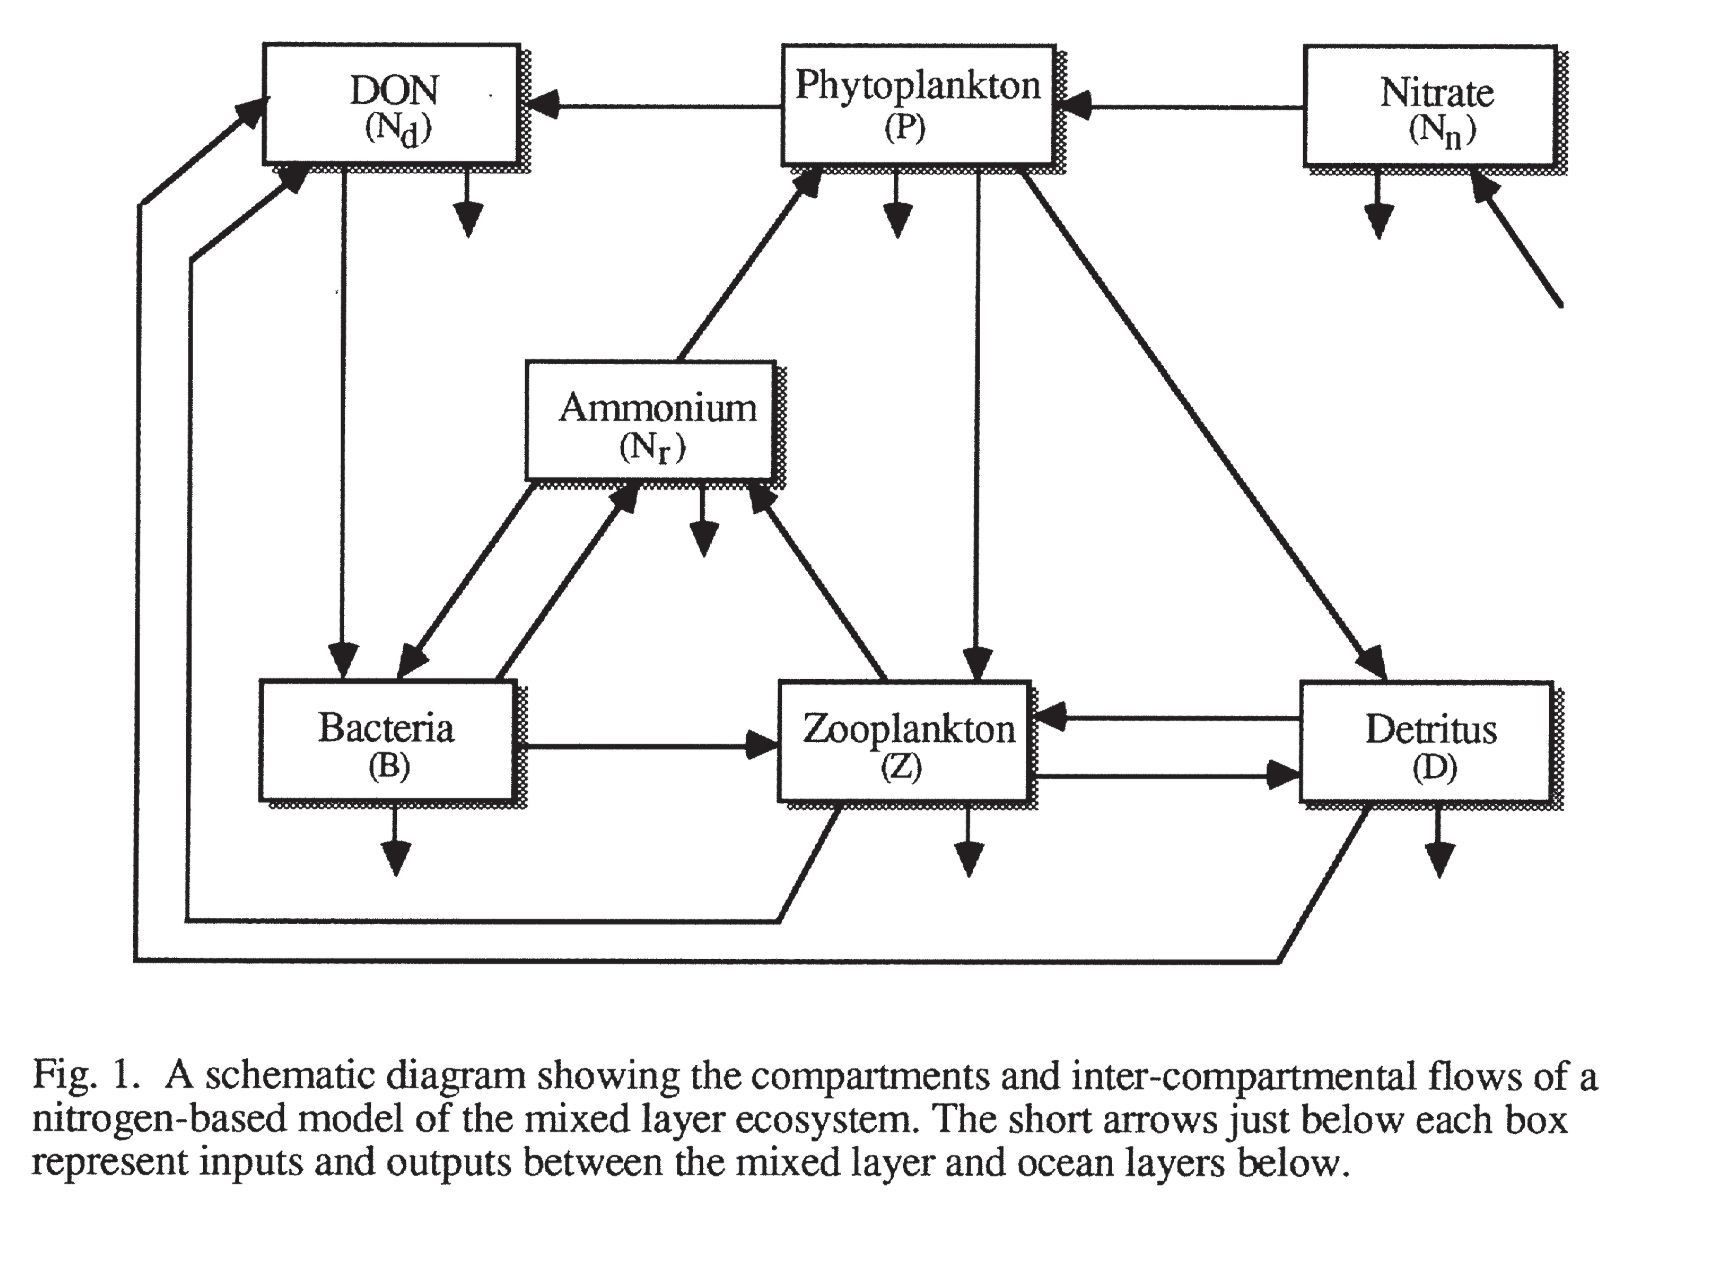
